In [10]:
# !pip install langchain_experimental
# !pip install matplotlib
# !pip install seaborn

In [11]:
import os

In [1]:
from langchain_openai import ChatOpenAI
from langchain_core.prompts import (
    ChatPromptTemplate,
)
from langchain_core.output_parsers import StrOutputParser
from langchain_experimental.utilities import PythonREPL

In [2]:
template = """Write some python code to solve the user's problem. 

Return only python code in Markdown format, e.g.:

```python
....
```"""
prompt = ChatPromptTemplate.from_messages([("system", template), ("human", "{input}")])

model = ChatOpenAI()

In [3]:
def _sanitize_output(text: str):
    _, after = text.split("```python")
    return after.split("```")[0]

In [4]:
chain = prompt | model | StrOutputParser() | _sanitize_output | PythonREPL().run

In [5]:
chain.invoke({"input": "whats 2 plus 2"})

Python REPL can execute arbitrary code. Use with caution.


'4\n'

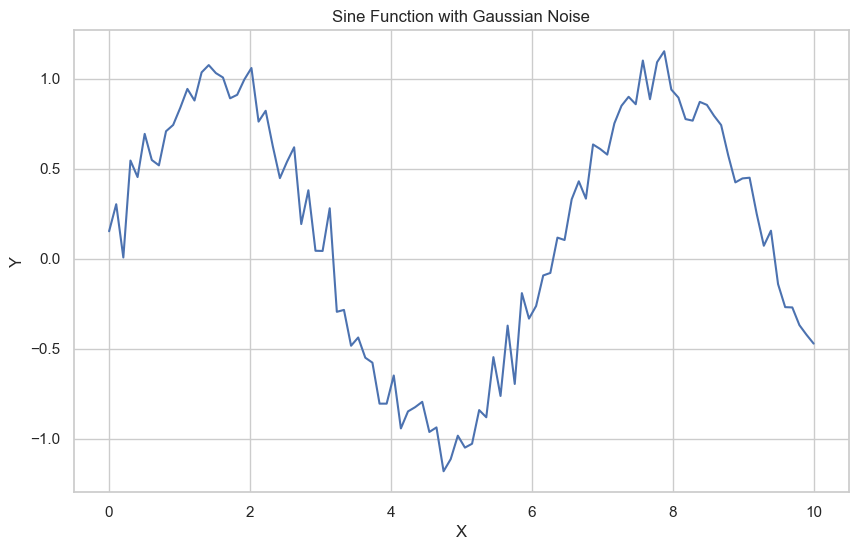

''

In [12]:
chain.invoke({"input": "Plot the sin of a function with some gaussian noise and style the plot nicely with seaborn."})